In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1
dfcom = pd.read_excel('RGPH2014_Commune.xlsx')

In [3]:
# Supprimer les entrées contenants au moins 50% des données manquantes
dfcom.dropna(thresh=(1/2)*dfcom.shape[1], inplace=True)
dfcom.drop(dfcom[dfcom['code_ac']==0].index, inplace=True)

In [4]:
# 2
dfcom.shape

(1687, 125)

In [5]:
# 3
dfcom.head(10)

,OBJECTID,nom_region,code_region,nom_province,code_province,nom_cercle,code_cercle,nom_commune,code_commune,nom_centre,...,IPP2004_T,IPM2004_T,DPSP_Educ2,DPSP_sante,DPSP_AEEA2,DPSP_Clog2,DFP_Pmon_u,DFP_Pmul_u,DFP_ND_MM_,TPG2014_T
0,1.0,Marrakech-Safi,7.0,Chichaoua,161.0,Chichaoua,3.0,Sid LMokhtar,16103113.0,Sid LMokhtar,...,8.457180,40.777008,62.889022,17.733411,10.804462,8.573106,1.41095,4.68346,0.783039,6.877449
1,2.0,Marrakech-Safi,7.0,Marrakech,351.0,LOUDAYA,5.0,Ait Imour,35105032.0,,...,11.511656,41.367142,67.551315,13.375796,4.352441,14.720453,2.79230,7.92297,0.309491,11.024761
2,3.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Bizdad,21105112.0,,...,30.337774,45.233658,62.800479,7.151443,15.658388,14.389691,6.07098,21.91380,4.258560,32.243340
3,4.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Bouzemmour,21105132.0,,...,45.628159,50.931080,48.984540,4.100492,24.378073,22.536895,6.92833,47.81570,13.225300,67.969330
4,5.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Ezzaouite,21105152.0,,...,35.322727,46.790127,56.600684,4.678554,21.244341,17.476416,8.37407,31.93500,7.285920,47.594990
5,6.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Ida Ou Kazzou,21105212.0,,...,38.527737,49.104725,45.472169,5.164775,28.805500,20.557556,10.19780,38.30940,14.133400,62.640600
6,7.0,Marrakech-Safi,7.0,Essaouira,211.0,ESSAOUIRA,3.0,Mzilate,21103232.0,,...,30.900431,45.389957,56.177270,13.731575,15.787432,14.303723,3.92017,27.34620,5.321930,36.588300
7,8.0,Marrakech-Safi,7.0,Essaouira,211.0,ESSAOUIRA,3.0,Ounagha,21103312.0,,...,25.320620,46.016071,56.479496,13.022082,16.561513,13.936909,2.30257,17.78200,1.879830,21.964400
8,9.0,Marrakech-Safi,7.0,Al Haouz,41.0,ASNI,7.0,Aghbar,4107012.0,,...,41.572628,46.964127,66.877496,6.350845,10.481477,16.290176,4.18757,19.78000,1.428020,25.395590
9,10.0,Marrakech-Safi,7.0,Chichaoua,161.0,CHICHAOUA,3.0,Sid LMokhtar,16103112.0,,...,26.795033,44.446735,57.479370,17.064697,11.940946,13.514979,3.38334,12.62450,1.368660,17.376500


In [6]:
# 4
list(dfcom)[0:20]

['OBJECTID',
 'nom_region',
 'code_region',
 'nom_province',
 'code_province',
 'nom_cercle',
 'code_cercle',
 'nom_commune',
 'code_commune',
 'nom_centre',
 'code_ac',
 'densite',
 'pop_t',
 'pop_m',
 'pop_f',
 'mq_t',
 'mq_m',
 'mq_f',
 'qcq_t',
 'qcq_m']

In [7]:
# 5_1 population municipale
dfcom['pop_t'].sum()

33610084.0

In [8]:
# 5_2 popoluation masculine
dfcom['pop_m'].sum()

16747522.0

In [9]:
# 5_3 population féminine
dfcom['pop_f'].sum()

16862562.0

In [10]:
# 5_4 nombre de ménages
# ménage: ensembe de personnes partageant le même logement et participant à son économie
# il s'agit le plus souvent d'une famille ou d'une personne seule
dfcom['NbMg_T'].sum()

7313806.0

In [11]:
# 6
# superficie = nb_hab/densité
dfcom['superficie'] = dfcom['pop_t']/dfcom['densite']

In [12]:
# 7
dfcom['type_commune'] = ['Centre urbain' if x in [3, 4, 5] else 
                         'Urbain' if x==1 else 
                         'Rural' if x==2 else None for x in dfcom['code_ac']]
dfcom['type_commune'].value_counts()

Rural            1282
Urbain            256
Centre urbain     149
Name: type_commune, dtype: int64

In [13]:
# 8_1 nombre de communes rurales
dfcom['type_commune'][dfcom['type_commune']=='Rural'].count()

1282

In [14]:
# 8_2 nombre de centre urbains
dfcom['type_commune'][dfcom['type_commune']=='Centre urbain'].count()

149

In [15]:
# 9 nombre de communes rurales ayant une population inférieure à la population de leur centre urbain
# Attention "Sidi Abdellah Ghiat" vs "Sidi Abdallah Ghiat"
# Si commune rurale a plusieurs centres urbain, il faut sommer le nb habitant des centres
centre_urbain = dfcom['code_commune'][dfcom['type_commune']=='Centre urbain']
counter = 0
df_temp = pd.DataFrame(columns=['commune_rurale', 'centre_urbain'])
for c in centre_urbain:
    commune_rurale_code = int(str(int(c))[:-1] + '2')
    nb_pop_centre = dfcom['pop_t'][dfcom['code_commune']==c].iloc[0]
    nb_pop_commune = dfcom['pop_t'][dfcom['code_commune']==commune_rurale_code].iloc[0]
    if nb_pop_commune < nb_pop_centre:
        
        df_temp = df_temp.append({'commune_rurale' : dfcom['nom_commune'][dfcom['code_commune']==commune_rurale_code].iloc[0],
                                  'centre_urbain' : dfcom['nom_centre'][dfcom['code_commune']==c].iloc[0]}, ignore_index=True)
        counter = counter + 1
    
counter
#df_temp

45

In [16]:
# 10_1 moyenne communes urbaines
dfcom['densite'][dfcom['type_commune']!='Rural'].mean()

3564.350575995111

In [17]:
# 10_2 moyenne communes rurales
dfcom['densite'][(dfcom['type_commune']=='Rural')].mean()

73.2694881736884

In [18]:
# 10_3 écart-type communes urbaines
dfcom['densite'][dfcom['type_commune']!='Rural'].std()

5547.539984390151

In [19]:
# 10_4 écart-type communes rurales
dfcom['densite'][(dfcom['type_commune']=='Rural')].std()

75.96848798374214

In [20]:
# 11_1 nombre de valeurs uniques
dfcom['nom_commune'].nunique()

1537

In [21]:
# 11_2 nom des communes qui se répète le plus
dfcom['nom_commune'].value_counts()

Moulay Abdallah    4
Sidi Boubker       3
Sidi Yahya Zaer    3
Oulad Aissa        3
Ajdir              3
                  ..
Berkane            1
Tazouta            1
Bni Rzine          1
Argana             1
Bouchane           1
Name: nom_commune, Length: 1537, dtype: int64

In [22]:
# 12_1 commune avec le taux net d'activité le plus haut
ta_max = dfcom.groupby('type_commune').max()['ta_t'].loc['Urbain']
dfcom['nom_commune'][(dfcom['type_commune']=='Urbain') & (dfcom['ta_t']==ta_max)]

1675    El Marsa
Name: nom_commune, dtype: object

In [23]:
# 12_2 commune avec le taux net d'activité le plus bas
ta_min = dfcom.groupby('type_commune').min()['ta_t'].loc['Urbain']
dfcom['nom_commune'][(dfcom['type_commune']=='Urbain') & (dfcom['ta_t']==ta_min)]

1676    Lagouira
Name: nom_commune, dtype: object

In [24]:
# 13
len(dfcom['OBJECTID'][dfcom['ta_t']<dfcom['ta_t'].mean()])

829

In [25]:
# 14
counter = 0
for c in dfcom['nom_commune']:
    if (c[0].lower() == 'a') or (c[2].lower() == 'a'):
        counter = counter + 1
        
counter

424

In [26]:
# 14
len([1 for c in dfcom['nom_commune'] if ((c[0].lower() == 'a') or (c[2].lower() == 'a'))])


424

In [27]:
# 14
def cond_a(c):
    if (c[0].lower() == 'a') or (c[2].lower() == 'a'):
        return 1
    else:
        return 0
dfcom['nom_commune'].apply(cond_a).sum()

424

                Urbain  Rural  Ensemble
Moins de 15ans    26.1   31.4      28.2
15-59 ans         64.6   59.0      62.4
60 ans et plus     9.3    9.7       9.4


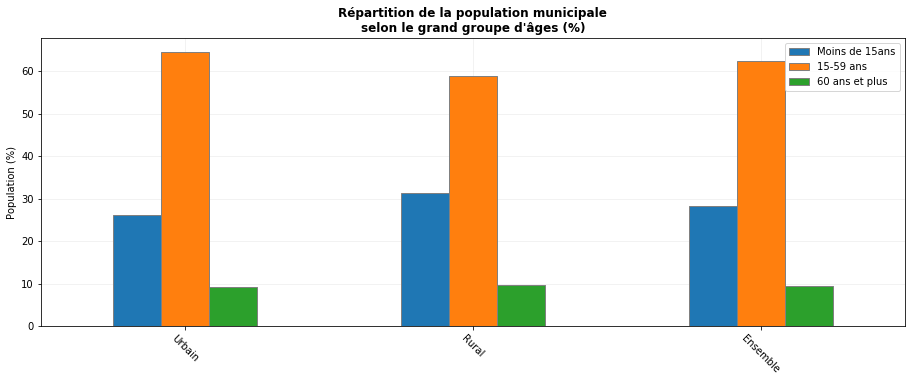

In [28]:
# 15
cat_age = {'mq_t':'Moins de 15ans',
           'qcq_t':'15-59 ans',
           'soix_t':'60 ans et plus'}

com_r_bool = dfcom['type_commune']=='Rural'

pop_r = dfcom['pop_t'][com_r_bool].sum()
pop_u = dfcom['pop_t'][~com_r_bool].sum()
pop_e = pop_r + pop_u

df_age = pd.DataFrame()

for key, label in cat_age.items():
    
    pop_r_age = (dfcom['pop_t'][com_r_bool] * dfcom[key][com_r_bool]).sum()
    pop_u_age = (dfcom['pop_t'][~com_r_bool] * dfcom[key][~com_r_bool]).sum()
    pop_e_age = pop_r_age + pop_u_age
    
    df_age.loc['Urbain', label] = round(pop_u_age / pop_u, 1)
    df_age.loc['Rural', label,] = round(pop_r_age / pop_r, 1)
    df_age.loc['Ensemble', label] = round(pop_e_age / pop_e, 1)
   
print(df_age.T)

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

df_age.plot.bar(ax=axes, edgecolor='gray')
plt.ylabel('Population (%)')
plt.xticks(rotation=-45)
plt.title(label="Répartition de la population municipale\nselon le grand groupe d'âges (%)",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()

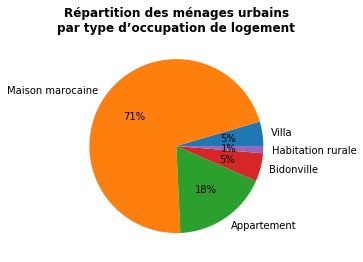

In [29]:
# 16 ménages urbains
logement = {'villa_u':'Villa',
            'mm_u':'Maison marocaine',
            'appa_u':'Appartement',
            'som_u':'Bidonville',
            'rural_u':'Habitation rurale'}

com_u_bool = dfcom['type_commune']!='Rural'
nb_mg = dfcom['NbMg_T'][com_u_bool].sum()
df_temp = pd.DataFrame()
                       
for key, label in logement.items():
    nb_logement = (dfcom['NbMg_T'][com_u_bool] * dfcom[key][com_u_bool]).sum()                
    df_temp.loc[label, 'logement'] = round(nb_logement / nb_mg, 1)


df_temp['logement'].plot(kind='pie', autopct='%1.0f%%')
plt.title("Répartition des ménages urbains\npar type d’occupation de logement", fontweight='bold')
plt.ylabel('')
plt.show()

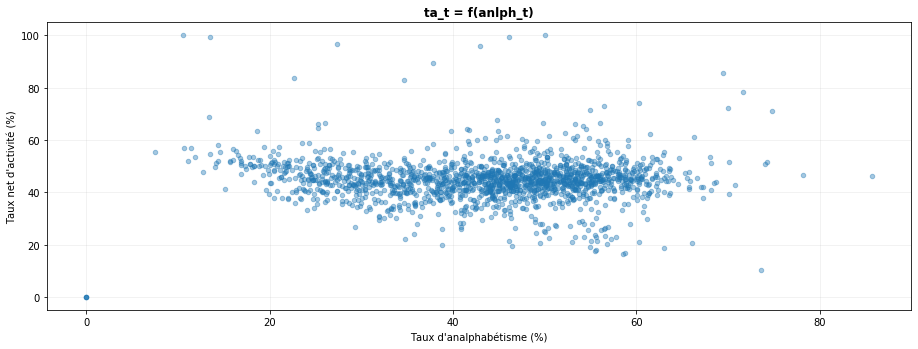

In [30]:
# 17 taux net d'activité (ta_t) vs taux d'analphabétisme de la pop +10ans (anlph_t)
# ta_t = f(anlph_t)
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

dfcom.sort_values('anlph_t').plot.scatter(x='anlph_t', y='ta_t', alpha=0.4, ax=axes)
plt.title("ta_t = f(anlph_t)", fontweight="bold")
plt.xlabel("Taux d'analphabétisme (%)")
plt.ylabel("Taux net d'activité (%)")
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()


          Masculin    Féminin
Urbain   97.335491  97.299753
Rural    92.243652  89.195129
Ensembe  93.466055  91.140815


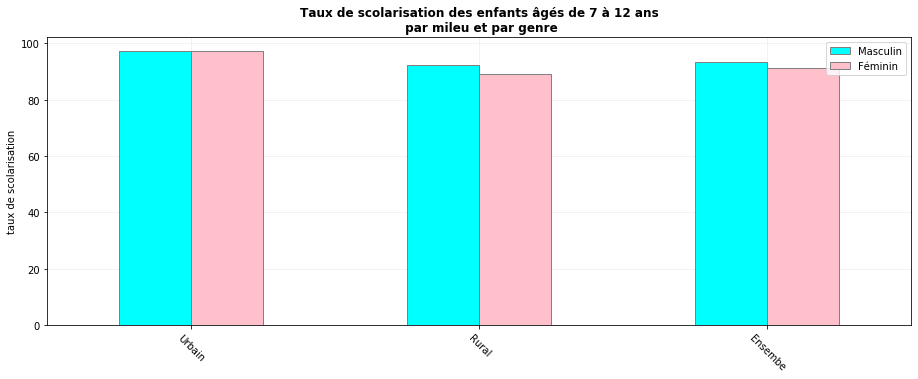

In [31]:
# 18
# taux scolarisation des enfants (7-12): scol_t
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

df_scol = pd.DataFrame()

df_scol.loc['Urbain', 'Masculin'] = dfcom['scol_m'][com_u_bool].mean()
df_scol.loc['Urbain', 'Féminin'] = dfcom['scol_f'][com_u_bool].mean()
df_scol.loc['Rural', 'Masculin'] = dfcom['scol_m'][com_r_bool].mean()
df_scol.loc['Rural', 'Féminin'] = dfcom['scol_f'][com_r_bool].mean()
df_scol.loc['Ensembe', 'Masculin'] = dfcom['scol_m'].mean()
df_scol.loc['Ensembe', 'Féminin'] = dfcom['scol_f'].mean()

df_scol.plot.bar(ax=axes, color=['cyan', 'pink'], edgecolor='gray')
plt.ylabel('taux de scolarisation')
plt.xticks(rotation=-45)
plt.title(label="Taux de scolarisation des enfants âgés de 7 à 12 ans\n par mileu et par genre",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
print(df_scol)
plt.show()

In [32]:
# 19

In [33]:
# 20

dfcom_cln = dfcom.drop([col for col in dfcom.columns if col.endswith(('_u', '_r', '_m', '_f'))], axis=1)
dfcom_cln.shape

(1687, 76)

In [34]:
# 21
dfcom_cln.to_excel('resultat_OEL_MBE.xlsx', sheet_name='commune', index=False)
#del dfcom_cln

In [35]:
# 22
cols = ['code_province', 'nom_province', 'pop_t', 'pop_u', 'pop_r', 'pop_m', 'pop_f',
        'NbMg_T', 'NbMg_U', 'NbMg_R', 'eau_t', 'elec_t']

code_prov = dfcom['code_province'].unique()
dfprov = pd.DataFrame(columns=cols)
data = {}

for code in code_prov:
    
    data['code_province'] = code
    data['nom_province'] =  dfcom['nom_province'][(dfcom['code_province']==code)].iloc[0]
    
    data['pop_r'] = dfcom['pop_t'][(dfcom['code_province']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['pop_u'] = dfcom['pop_t'][(dfcom['code_province']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['pop_t'] = data['pop_r'] + data['pop_u']
    
    data['pop_m'] = dfcom['pop_m'][(dfcom['code_province']==code)].sum()
    data['pop_f'] = dfcom['pop_f'][(dfcom['code_province']==code)].sum()
    
    data['NbMg_R'] = dfcom['NbMg_T'][(dfcom['code_province']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['NbMg_U'] = dfcom['NbMg_T'][(dfcom['code_province']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['NbMg_T'] = data['NbMg_R'] + data['NbMg_U'] 
    
    data['eau_t'] = dfcom['eau_t'][(dfcom['code_province']==code)].mean()
    data['elec_t'] = dfcom['elec_t'][(dfcom['code_province']==code)].mean()
    
    dfprov = dfprov.append(data, ignore_index=True)

dfprov

,code_province,nom_province,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,eau_t,elec_t
0,161.0,Chichaoua,369494.0,62218.0,307276.0,184472.0,185022.0,73928.0,13776.0,60152.0,55.543981,85.704015
1,351.0,Marrakech,1323005.0,974021.0,348984.0,654865.0,668140.0,302137.0,229063.0,73074.0,90.213455,94.143372
2,211.0,Essaouira,449133.0,105596.0,343537.0,225450.0,223683.0,95520.0,26873.0,68647.0,34.784701,81.149335
3,41.0,Al Haouz,571999.0,84205.0,487794.0,291795.0,280204.0,111627.0,18845.0,92782.0,80.024284,93.441302
4,191.0,El Kelaa des Sraghna,535753.0,152649.0,383104.0,271904.0,263849.0,97874.0,31920.0,65954.0,86.916035,94.758909
...,...,...,...,...,...,...,...,...,...,...,...,...
70,321.0,Laayoune,232416.0,229979.0,2437.0,119122.0,113294.0,53561.0,52860.0,701.0,44.724792,62.541937
71,537.0,Tarfaya,13028.0,7986.0,5042.0,7158.0,5870.0,3393.0,2092.0,1301.0,61.295091,63.310010
72,121.0,Boujdour,44440.0,42504.0,1936.0,23857.0,20583.0,10186.0,9511.0,675.0,43.244294,49.090560
73,66.0,Aousserd,2396.0,0.0,2396.0,1836.0,560.0,776.0,0.0,776.0,15.462930,31.780567


In [36]:
# 23
with pd.ExcelWriter('resultat_OEL_MBE.xlsx', engine='openpyxl', mode='a') as writer:
    dfprov.sort_values('code_province').to_excel(writer, sheet_name='province', index=False)

In [37]:
# 24
cols = ['code_region', 'nom_region', 'pop_t', 'pop_u', 'pop_r', 'pop_m', 'pop_f',
        'NbMg_T', 'NbMg_U', 'NbMg_R', 'eau_t', 'elec_t']

code_reg = dfcom['code_region'].unique()
dfreg = pd.DataFrame(columns=cols)
data = {}

for code in code_reg:
    
    data['code_region'] = code
    data['nom_region'] =  dfcom['nom_region'][(dfcom['code_region']==code)].iloc[0]
    
    data['pop_r'] = dfcom['pop_t'][(dfcom['code_region']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['pop_u'] = dfcom['pop_t'][(dfcom['code_region']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['pop_t'] = data['pop_r'] + data['pop_u']
    
    data['pop_m'] = dfcom['pop_m'][(dfcom['code_region']==code)].sum()
    data['pop_f'] = dfcom['pop_f'][(dfcom['code_region']==code)].sum()
    
    data['NbMg_R'] = dfcom['NbMg_T'][(dfcom['code_region']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['NbMg_U'] = dfcom['NbMg_T'][(dfcom['code_region']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['NbMg_T'] = data['NbMg_R'] + data['NbMg_U'] 
    
    data['eau_t'] = dfcom['eau_t'][(dfcom['code_region']==code)].mean()
    data['elec_t'] = dfcom['elec_t'][(dfcom['code_region']==code)].mean()
    
    dfreg = dfreg.append(data, ignore_index=True)

dfreg

,code_region,nom_region,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,eau_t,elec_t
0,7.0,Marrakech-Safi,4504767.0,1928525.0,2576242.0,2267818.0,2236949.0,928120.0,444856.0,483264.0,56.492146,87.558249
1,8.0,Draa-Tafilalet,1627269.0,555461.0,1071808.0,796405.0,830864.0,277998.0,114631.0,163367.0,75.608919,89.706438
2,9.0,Souss-Massa,2657906.0,1493198.0,1164708.0,1300313.0,1357593.0,601511.0,353802.0,247709.0,65.008580,89.586835
3,6.0,Grand Casablanca-Settat,6826773.0,5022475.0,1804298.0,3414102.0,3412671.0,1559404.0,1214427.0,344977.0,37.079278,89.549764
4,5.0,Béni Mellal-Khénifra,2512375.0,1233846.0,1278529.0,1236817.0,1275558.0,520174.0,287268.0,232906.0,48.743376,74.222914
5,4.0,Rabat-Salé-Kénitra,4552585.0,3172955.0,1379630.0,2262836.0,2289749.0,1015107.0,766852.0,248255.0,41.513117,82.324212
6,3.0,Fès-Meknès,4216957.0,2549791.0,1667166.0,2088237.0,2128720.0,919497.0,600113.0,319384.0,42.731149,85.470818
7,2.0,Oriental,2302182.0,1504517.0,797665.0,1141574.0,1160608.0,494530.0,338419.0,156111.0,42.848542,78.838358
8,1.0,Tanger-Tétouan-Al Hoceima,3540012.0,2120666.0,1419346.0,1795813.0,1744199.0,799124.0,525168.0,273956.0,28.556493,90.014054
9,10.0,Guelmim-Oued Noun,414489.0,270419.0,144070.0,201862.0,212627.0,90202.0,60873.0,29329.0,55.536448,79.246405


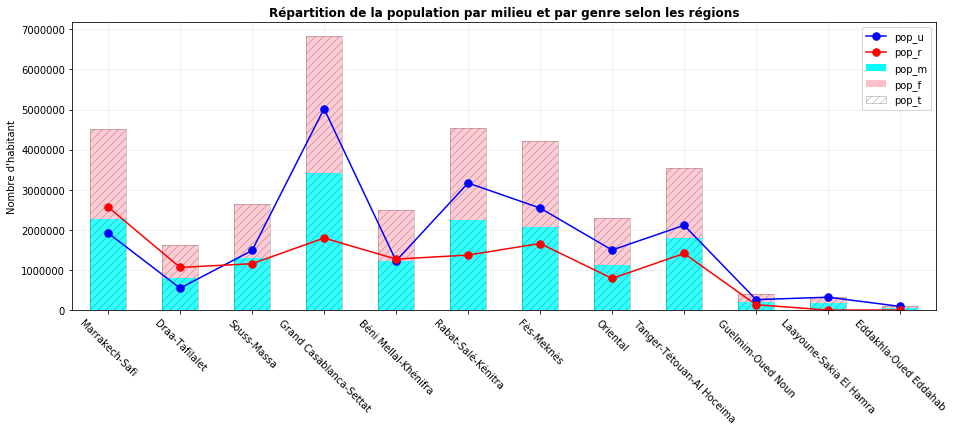

In [38]:
# 25
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
dfreg.plot.bar(x='nom_region', y=['pop_m', 'pop_f'], ax=axes, stacked=True, color=['cyan', 'pink'])
dfreg.plot.bar(x='nom_region', y='pop_t', ax=axes, stacked=True, color='white', hatch='/'*3, edgecolor='black', alpha=0.2)
dfreg.plot(x='nom_region', y='pop_u', ax=axes, color='blue', style='.-', ms=15)
dfreg.plot(x='nom_region', y='pop_r', ax=axes, color='red', style='.-', ms=15)

axes.legend(loc='upper right')
plt.ylabel("Nombre d'habitant")
plt.xlabel(None)
plt.xticks(rotation=-45)
plt.title(label="Répartition de la population par milieu et par genre selon les régions",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()


In [39]:
# 26
with pd.ExcelWriter('resultat_OEL_MBE.xlsx', engine='openpyxl', mode='a') as writer:
    dfreg.sort_values('code_region').to_excel(writer, sheet_name='region', index=False)